In [1]:
from pptx import Presentation
from pptx.util import Cm,Pt
from pptx.util import Inches  #英尺单位

from pptx.enum.shapes import MSO_SHAPE

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO     #plt的图形出入IO，然后写入PPT
from io import BytesIO

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
prs = Presentation(r".\testfile\pptMother.pptx")  #使用自定义模板
# prs_t = Presentation()   #使用默认模板

# 输出shape中的文字
    1. shape.has_text_frame: 判断是否有文字
    2. 获取文本框内容：
        方法1：
            shape.text_frame: 获取文字框
            text_frame.text: 获取文字框中的文字
        方法2：
            shape.text

In [ ]:
for slide in prs.slides:    #迭代ppt中所有的slide
    print("page:"+"*"*10)
    print(slide)
    for shape in slide.shapes:    #迭代slide中所有的shape
        print("shape:"+"*"*20+":")
        print(shape)
        if shape.has_text_frame:    #判断shape中是否有text_frame
            text_frame = shape.text_frame
            print("content:"+"-"*40)
            print(text_frame.text)
            print("end:"+"-"*60)


In [ ]:
for shape in prs.slides[1].shapes:
    print(shape.text)

# paragraph：段落
    从shape中找paragraphs:获取shape中的段落
    for paragraph in text_frame.paragraphs:
        print(paragraph)

In [ ]:
for shape in prs.slides[1].shapes:
    text_frame = shape.text_frame
#     print(text_frame.text)
    for paragraph in text_frame.paragraphs:   #text_frame下一级就是paragraph
        print(paragraph.text)
    print("*"*20)
    
# 注意：
# 该方法同样也直接获取Shpae中的文字内容；
# 但是这个更灵活，先获取每个Shape，然后在获取每个Shape中的paragraph；
# 我们可以针对paragraph，写一个判断条件，只获取第几个paragraph；

# 向ppt中添加slide
    prs.slides.add_slide(prs.slide.layout[index]): 添加第几个模板

In [4]:
slide1 = prs.slides.add_slide(prs.slide_layouts[1])

## 确认占位符id&向占位符内填写内容
    shape.text = str

In [5]:
for shape in slide1.placeholders:
    phf = shape.placeholder_format
    print(f"{phf.idx}--{shape.name}--{phf.type}")   # id号--占位符形状名称-占位符的类型
    print()
# title 标题类型的占位符
# subtitle 副标题类型的占位符
# body 正文类型的占位符

shapes = slide1.placeholders
shapes[0].text = "First slide: write text in shape"
shapes[1].text = "This is first slide for practice"

0--Title 1--TITLE (1)

1--Content Placeholder 2--OBJECT (7)



## 添加段落

In [6]:
slide2 = prs.slides.add_slide(prs.slide_layouts[1])  #再添加一页PPT

In [7]:
shapes = slide2.shapes
title_shape = shapes.title
title_shape.text = "Second Slide: write paragraph to body_shape"

body_shape = shapes.placeholders[1]
tf = body_shape.text_frame
tf.text = "line1"

p = tf.add_paragraph()
p.text="Line2"

p = tf.add_paragraph()
p.text = "Line3"

## 给段落添加层级
    paragraph.level=int [0是最顶层]

In [8]:
slide3 = prs.slides.add_slide(prs.slide_layouts[1])  #再添加一页PPT

In [9]:
shapes = slide3.shapes
title_shape = shapes.title
title_shape.text = "Third Slide: add the level for the paragraph"

body_shape = shapes.placeholders[1]
tf = body_shape.text_frame

p = tf.add_paragraph()
p.text = "Line1"
p.level = 0

p = tf.add_paragraph()
p.text = "Line1_1"
p.level = 1

p = tf.add_paragraph()
p.text = "Line1_2"
p.level = 1

p = tf.add_paragraph()
p.text = "Line2"
p.level = 0

p = tf.add_paragraph()
p.text = "Line2_1"
p.level = 1

p = tf.add_paragraph()
p.text = "Line2_2"
p.level = 1


## 向slide中添加文本框

In [10]:
slide4 = prs.slides.add_slide(prs.slide_layouts[4])  #再添加一页PPT

In [11]:
shapes = slide4.placeholders
shapes[0].text = "Forth Slide: Add textbox"

In [12]:
left = top = Cm(3)
width = Cm(18)
height = Cm(6)   ## left，top为相对位置，width，height为文本框大小。满足条件顺序是左>上>右>下


text_box = slide4.shapes.add_textbox(left,top,width,height)
tf = text_box.text_frame
tf.text = "This is Firt Line in First texbox"

p = tf.add_paragraph()
p.text = "Scond line text with bold and fontsize:40"
p.font.bold = True
p.font.size = Pt(40)

## 添加形状
    slide_layout = prs.slide_layouts[SLD_LAYOUT_TITLE_AND_CONTENT]

In [13]:
slide5 = prs.slides.add_slide(prs.slide_layouts[4])

In [14]:
slide5.placeholders[0].text = "Fifth Slide:Add the shape"

shapes = slide5.shapes
left = top = width = height = Inches(1.0)
shape = shapes.add_shape(MSO_SHAPE.ROUNDED_RECTANGLE,left,top,width,height)

## 添加图片

In [15]:
f = r".\testfile\testdata.csv"
dt = pd.read_csv(f,index_col=0,header=0)
df = dt[dt["T031006_Value"].notna()].query("T031006_Value<0.05")

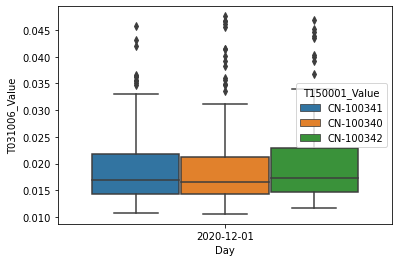

In [18]:
sns.boxplot(data=df,x="Day",y="T031006_Value",hue="T150001_Value")
plt.savefig(r".\testfile\snspic.png")

In [19]:
slide5 = prs.slides.add_slide(prs.slide_layouts[4])
slide5.placeholders[0].text = "Sixth Slide:Add pictures"

In [20]:
left = top = Cm(3)
pic = slide5.shapes.add_picture(r".\testfile\snspic.png",left,top)

top = Cm(13)
height = Cm(5)
pic = slide5.shapes.add_picture(r".\testfile\yieldfrom.JPG",left,top,height=height)

In [21]:
prs.save(r".\testfile\ppttest_out.pptx")